O estudo abaixo tem com objetivo separar a base em grupos para uma melhor análise.

In [18]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import time


df = pd.read_csv('C:\OneDrive\Bkp_Documentos\marcos\mba\BIG_Data_Maning\complete\complete.csv', sep=',', encoding='utf8')

Primeiro visão da base

In [19]:
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


Analisando os tipos de dados no dataset

In [20]:
df.dtypes

ID                                int64
name                             object
full_name                        object
club                             object
club_logo                        object
special                           int64
age                               int64
league                           object
birth_date                       object
height_cm                       float64
weight_kg                       float64
body_type                        object
real_face                          bool
flag                             object
nationality                      object
photo                            object
eur_value                       float64
eur_wage                        float64
eur_release_clause              float64
overall                           int64
potential                         int64
pac                               int64
sho                               int64
pas                               int64
dri                               int64


Montando um dataframe só com as variáveis numéricas para realizar uma análise de correlação, normalização da escala e Kmeans

In [21]:
import numpy as np
df_num = df.select_dtypes(include=[np.float,np.bool,np.int,np.int64])
df_num.dtypes

ID                                int64
special                           int64
age                               int64
height_cm                       float64
weight_kg                       float64
real_face                          bool
eur_value                       float64
eur_wage                        float64
eur_release_clause              float64
overall                           int64
potential                         int64
pac                               int64
sho                               int64
pas                               int64
dri                               int64
def                               int64
phy                               int64
international_reputation          int64
skill_moves                       int64
weak_foot                         int64
crossing                          int64
finishing                         int64
heading_accuracy                  int64
short_passing                     int64
volleys                           int64


Os dados missing e a coluna de ID são retirados para não afetar na análise

In [22]:
df_num_clear = df_num.drop('ID',1)
df_num_clear = df_num_clear.fillna(0)


df_corr = df_num_clear.corr().fillna(0)
df_corr

,special,age,height_cm,weight_kg,real_face,eur_value,eur_wage,eur_release_clause,overall,potential,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
special,1.000000,0.239652,-0.380680,-0.281998,0.211911,0.374652,0.366077,0.347487,0.602892,0.395498,...,-0.082802,0.142423,0.061026,0.0,0.0,0.0,0.0,0.0,0.0,-0.713369
age,0.239652,1.000000,0.076463,0.219722,0.142091,0.080431,0.150949,0.071234,0.460902,-0.223340,...,0.054940,0.014247,0.000947,0.0,0.0,0.0,0.0,0.0,0.0,0.071212
height_cm,-0.380680,0.076463,1.000000,0.766900,0.024189,0.002631,0.020784,0.002337,0.042723,0.003969,...,0.329081,-0.100800,-0.049597,0.0,0.0,0.0,0.0,0.0,0.0,0.366555
weight_kg,-0.281998,0.219722,0.766900,1.000000,0.055301,0.036923,0.059275,0.032238,0.136611,-0.012879,...,0.273953,-0.087931,-0.035901,0.0,0.0,0.0,0.0,0.0,0.0,0.343268
real_face,0.211911,0.142091,0.024189,0.055301,1.000000,0.402883,0.496536,0.386471,0.342843,0.283657,...,0.003740,-0.000070,0.020229,0.0,0.0,0.0,0.0,0.0,0.0,-0.023959
eur_value,0.374652,0.080431,0.002631,0.036923,0.402883,1.000000,0.851631,0.969495,0.624772,0.584200,...,-0.018627,-0.044646,-0.005524,0.0,0.0,0.0,0.0,0.0,0.0,-0.054059
eur_wage,0.366077,0.150949,0.020784,0.059275,0.496536,0.851631,1.000000,0.818671,0.594408,0.516598,...,-0.003511,-0.017129,0.010267,0.0,0.0,0.0,0.0,0.0,0.0,-0.056507
eur_release_clause,0.347487,0.071234,0.002337,0.032238,0.386471,0.969495,0.818671,1.000000,0.584584,0.552629,...,-0.015339,-0.039012,-0.002983,0.0,0.0,0.0,0.0,0.0,0.0,-0.046803
overall,0.602892,0.460902,0.042723,0.136611,0.342843,0.624772,0.594408,0.584584,1.000000,0.678778,...,0.035927,-0.006328,0.011803,0.0,0.0,0.0,0.0,0.0,0.0,-0.078807
potential,0.395498,-0.223340,0.003969,-0.012879,0.283657,0.584200,0.516598,0.552629,0.678778,1.000000,...,0.004607,-0.041915,0.001254,0.0,0.0,0.0,0.0,0.0,0.0,-0.086355


Normalização de escala da variaveis de 0 a 1 

In [23]:


scaler = MinMaxScaler()

normalized_df=pd.DataFrame(scaler.fit_transform( df_num_clear))
normalized_df.columns = df_num_clear.columns
normalized_df.head()

,special,age,height_cm,weight_kg,real_face,eur_value,eur_wage,eur_release_clause,overall,potential,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,0.959693,0.516129,0.60,0.508197,1.0,0.776423,1.000000,0.826858,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.914907,0.451613,0.30,0.377049,1.0,0.853659,1.000000,0.909206,0.979167,0.979167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.877799,0.290323,0.40,0.311475,1.0,1.000000,0.495575,1.000000,0.958333,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.451613,0.54,0.606557,1.0,0.788618,0.902655,0.839949,0.958333,0.958333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.489443,0.483871,0.76,0.704918,1.0,0.495935,0.407080,0.425253,0.958333,0.958333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Criação do range para definir a quantidade de grupos, seguindo a técnica WSS

In [24]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [25]:
score = [kmeans[i].fit(normalized_df).score(normalized_df) for i in range(len(kmeans))]
score

[-98580.429894191519,
 -63983.055967285676,
 -54426.189225450536,
 -48979.84641792241,
 -46155.468550583333,
 -43395.058938929782,
 -41867.368786473293,
 -40840.830088641123,
 -39652.33636215538,
 -38884.533947808624,
 -38010.084346129923,
 -37232.409058000361,
 -36593.779967422575,
 -36117.087023012318,
 -35644.086062112794,
 -35170.21503245303,
 -34822.794406442117,
 -34392.301175621105,
 -34037.735125325009]

Observando o gráfico abaixo vemos que a curva torna-se continua na marca de 7 cluster. Isso significa que o número de grupos indicado é 7.

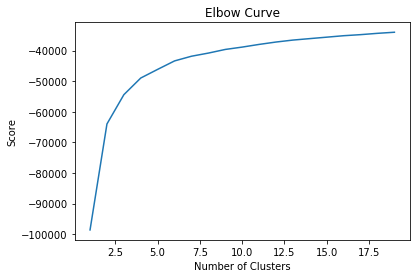

In [26]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Preparando o modelo com a base

In [27]:
kmeans=KMeans(n_clusters=7)

kmeansoutput=kmeans.fit(normalized_df)







Marcando as linhas da base original com os respectivos clusters

In [28]:
labels = kmeansoutput.labels_

df['cluster'] = labels
df.head()


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,cluster
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,5
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,5
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,5
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,5
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,True,2


Exportando a base para ser utilizada no ferramenta de BI

In [65]:
df.to_csv('C:\OneDrive\Bkp_Documentos\marcos\mba\BIG_Data_Maning\complete\complete_cluster.csv', sep=',', encoding='utf-8')

Exportando a base para ser utilizada no ferramenta de BI

In [7]:
normalized_df['ID'] = df['ID']
normalized_df.to_csv('C:\OneDrive\Bkp_Documentos\marcos\mba\BIG_Data_Maning\complete\complete_normalized.csv', sep=',', encoding='utf-8')

Exportando a matriz de correlação

In [9]:
df_corr.to_csv('C:\OneDrive\Bkp_Documentos\marcos\mba\BIG_Data_Maning\complete\complete_correlacao.csv', sep=',', encoding='utf-8')

In [31]:
df_num_clear['potential'].describe()

count    17994.000000
mean        71.200400
std          6.082015
min         46.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         94.000000
Name: potential, dtype: float64